In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
#plt.style.use('seaborn-v0_8-colorblind')

In [3]:
df = pd.read_csv(r'W:\Sample Datasets\online sales data\Online Sales Data.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Transaction ID    240 non-null    int64  
 1   Date              240 non-null    object 
 2   Product Category  240 non-null    object 
 3   Product Name      240 non-null    object 
 4   Units Sold        240 non-null    int64  
 5   Unit Price        240 non-null    float64
 6   Total Revenue     240 non-null    float64
 7   Region            240 non-null    object 
 8   Payment Method    240 non-null    object 
dtypes: float64(2), int64(2), object(5)
memory usage: 17.0+ KB


In [5]:
df.isnull().sum()

Transaction ID      0
Date                0
Product Category    0
Product Name        0
Units Sold          0
Unit Price          0
Total Revenue       0
Region              0
Payment Method      0
dtype: int64

In [6]:
df.duplicated().sum()

0

In [7]:
df.head()

,Transaction ID,Date,Product Category,Product Name,Units Sold,Unit Price,Total Revenue,Region,Payment Method
0,10001,2024-01-01,Electronics,iPhone 14 Pro,2,999.99,1999.98,North America,Credit Card
1,10002,2024-01-02,Home Appliances,Dyson V11 Vacuum,1,499.99,499.99,Europe,PayPal
2,10003,2024-01-03,Clothing,Levi's 501 Jeans,3,69.99,209.97,Asia,Debit Card
3,10004,2024-01-04,Books,The Da Vinci Code,4,15.99,63.96,North America,Credit Card
4,10005,2024-01-05,Beauty Products,Neutrogena Skincare Set,1,89.99,89.99,Europe,PayPal


In [8]:
df['Date'] = pd.to_datetime(df['Date'])

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Transaction ID    240 non-null    int64         
 1   Date              240 non-null    datetime64[ns]
 2   Product Category  240 non-null    object        
 3   Product Name      240 non-null    object        
 4   Units Sold        240 non-null    int64         
 5   Unit Price        240 non-null    float64       
 6   Total Revenue     240 non-null    float64       
 7   Region            240 non-null    object        
 8   Payment Method    240 non-null    object        
dtypes: datetime64[ns](1), float64(2), int64(2), object(4)
memory usage: 17.0+ KB


In [10]:
df['Month'] = df['Date'].dt.month
df['Month'] = df['Month'].replace({ 1: 'January',
                                    2: 'February',
                                    3: 'March',
                                    4: 'April',
                                    5: 'May',
                                    6: 'June',
                                    7: 'July',
                                    8: 'August',
                                    9: 'September',
                                    10: 'October',
                                    11: 'November',
                                    12: 'December'
                                    })

In [11]:
df.columns

Index(['Transaction ID', 'Date', 'Product Category', 'Product Name',
       'Units Sold', 'Unit Price', 'Total Revenue', 'Region', 'Payment Method',
       'Month'],
      dtype='object')

In [12]:
df['Product Category'].unique()

array(['Electronics', 'Home Appliances', 'Clothing', 'Books',
       'Beauty Products', 'Sports'], dtype=object)

In [13]:
df['Product Category'].value_counts()

Product Category
Electronics        40
Home Appliances    40
Clothing           40
Books              40
Beauty Products    40
Sports             40
Name: count, dtype: int64

In [14]:
df['Region'].unique()

array(['North America', 'Europe', 'Asia'], dtype=object)

In [15]:
df['Region'].value_counts()

Region
North America    80
Europe           80
Asia             80
Name: count, dtype: int64

In [16]:
df['Payment Method'].unique()

array(['Credit Card', 'PayPal', 'Debit Card'], dtype=object)

In [17]:
df['Payment Method'].value_counts()

Payment Method
Credit Card    120
PayPal          80
Debit Card      40
Name: count, dtype: int64

In [18]:
df['Month'].unique()

array(['January', 'February', 'March', 'April', 'May', 'June', 'July',
       'August'], dtype=object)

In [19]:
df['Month'].value_counts()

Month
January     31
March       31
May         31
July        31
April       30
June        30
February    29
August      27
Name: count, dtype: int64

In [20]:
Sales_Trend = df.groupby('Date')['Total Revenue'].sum().reset_index()
Sales_Trend

,Date,Total Revenue
0,2024-01-01,1999.98
1,2024-01-02,499.99
2,2024-01-03,209.97
3,2024-01-04,63.96
4,2024-01-05,89.99
...,...,...
235,2024-08-23,159.99
236,2024-08-24,270.00
237,2024-08-25,32.97
238,2024-08-26,55.00


Text(0.5, 1.0, 'Revenue Over Time')

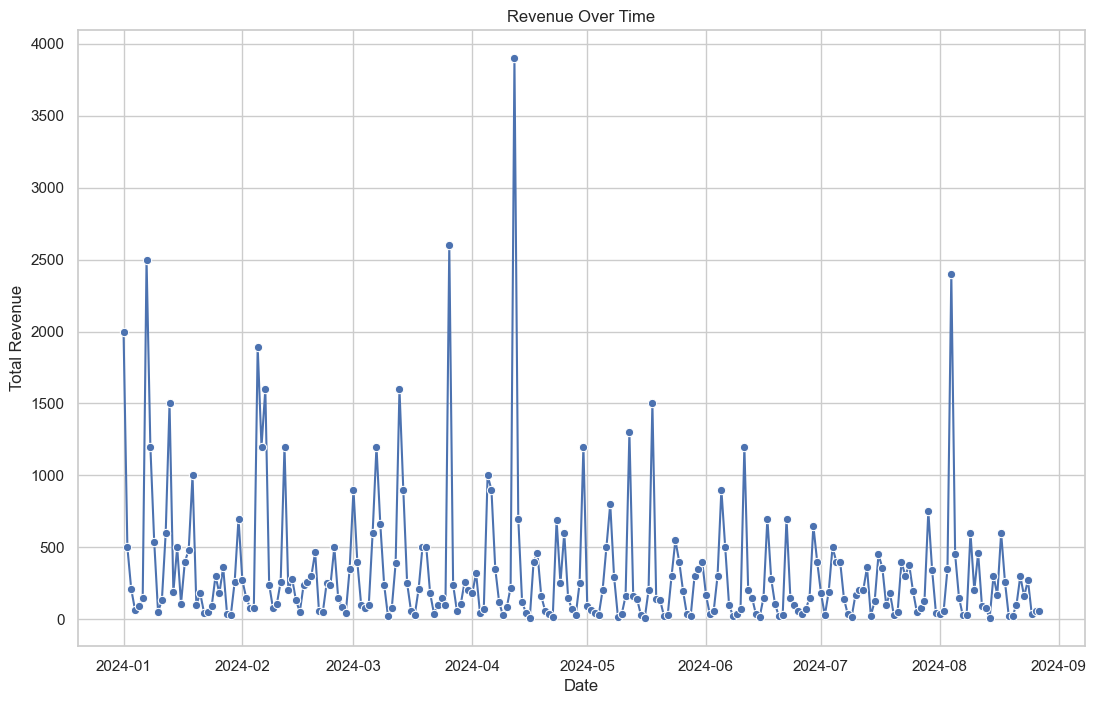

In [21]:
sns.set(style="whitegrid")
plt.figure(figsize=(13,8))
sns.lineplot(data=Sales_Trend, x='Date', y='Total Revenue',marker='o')
plt.title('Revenue Over Time')
#plt.xlabel('Sales')

In [22]:
sales_monthly = df.groupby('Month')['Total Revenue'].sum().reset_index()
sales_monthly

,Month,Total Revenue
0,April,12451.69
1,August,7278.11
2,February,10803.37
3,January,14548.32
4,July,6797.08
5,June,7384.55
6,March,12849.24
7,May,8455.49


Text(0.5, 1.0, 'Sales Over Month')

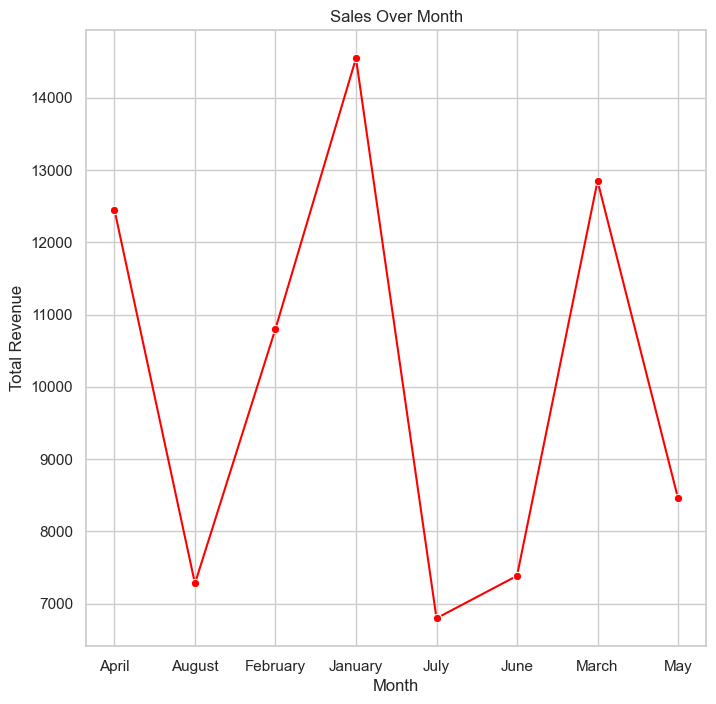

In [30]:
sns.set(style="whitegrid")
plt.figure(figsize=(8,8))
sns.lineplot(data=sales_monthly, x='Month', y='Total Revenue',marker='o', color = 'red')
plt.title('Sales Over Month')

In [24]:
Product_Category_trend = df.groupby('Product Category')['Total Revenue'].sum().reset_index()
Product_Category_trend

,Product Category,Total Revenue
0,Beauty Products,2621.90
1,Books,1861.93
2,Clothing,8128.93
3,Electronics,34982.41
4,Home Appliances,18646.16
5,Sports,14326.52


<Axes: xlabel='Product Category', ylabel='Total Revenue'>

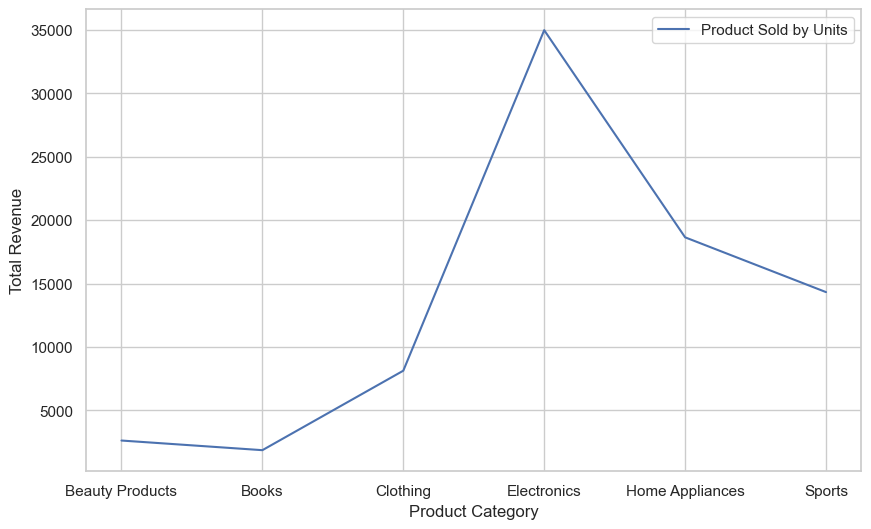

In [25]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=Product_Category_trend, x='Product Category', y='Total Revenue', label='Product Sold by Units')

([0, 1, 2, 3, 4, 5],
 [Text(0, 0, 'Electronics'),
  Text(1, 0, 'Home Appliances'),
  Text(2, 0, 'Clothing'),
  Text(3, 0, 'Books'),
  Text(4, 0, 'Beauty Products'),
  Text(5, 0, 'Sports')])

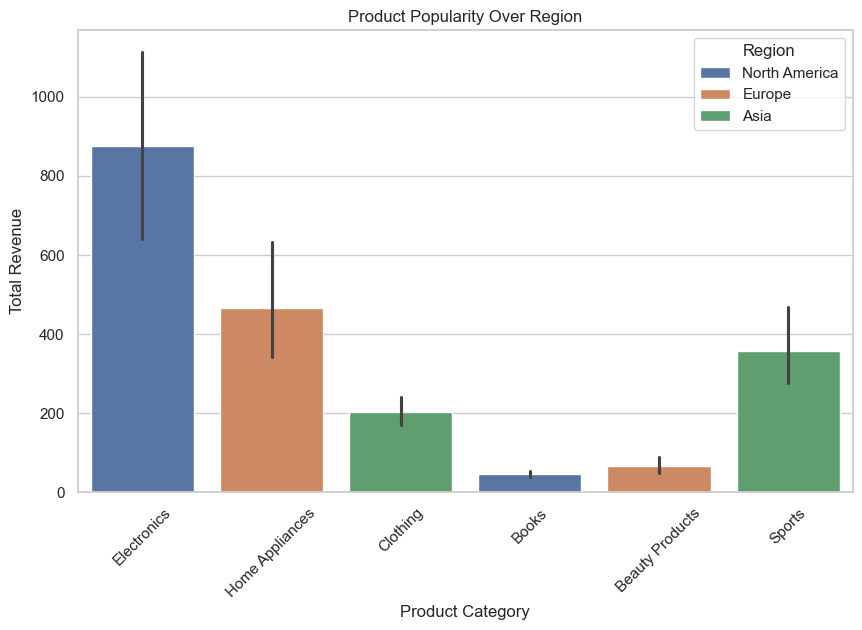

In [26]:
plt.figure(figsize=(10, 6))

sns.barplot(data=df, x=df['Product Category'],y=df['Total Revenue'],hue=df['Region'])
plt.title('Product Popularity Over Region')
plt.xlabel='Product Categories'
plt.ylabel='Units Sold'
plt.xticks(rotation=45)

In [27]:
region_sales = df.groupby('Region')['Total Revenue'].sum().reset_index()
region_sales

,Region,Total Revenue
0,Asia,22455.45
1,Europe,21268.06
2,North America,36844.34


Text(0.5, 1.0, 'Region Having Most Sales')

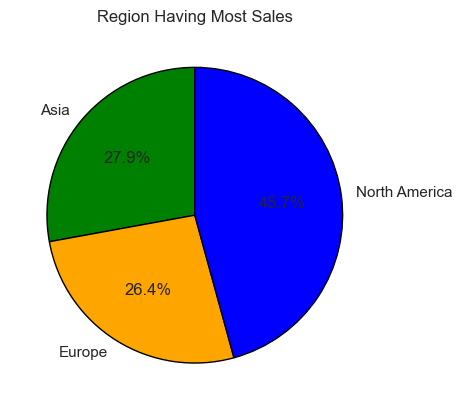

In [226]:
#sns.set_style(style='white')
labels = ['Asia', 'Europe', 'North America']
plt.pie(data=region_sales, x='Total Revenue', labels = labels, autopct='%1.1f%%',startangle=90, colors=['green', 'orange', 'blue'],
        wedgeprops={'edgecolor': 'black'})
plt.title('Region Having Most Sales')

In [ ]:
palettes = ['deep', 'muted', 'pastel', 'bright', 'dark', 'colorblind']

<Axes: xlabel='Payment Method', ylabel='Total Revenue'>

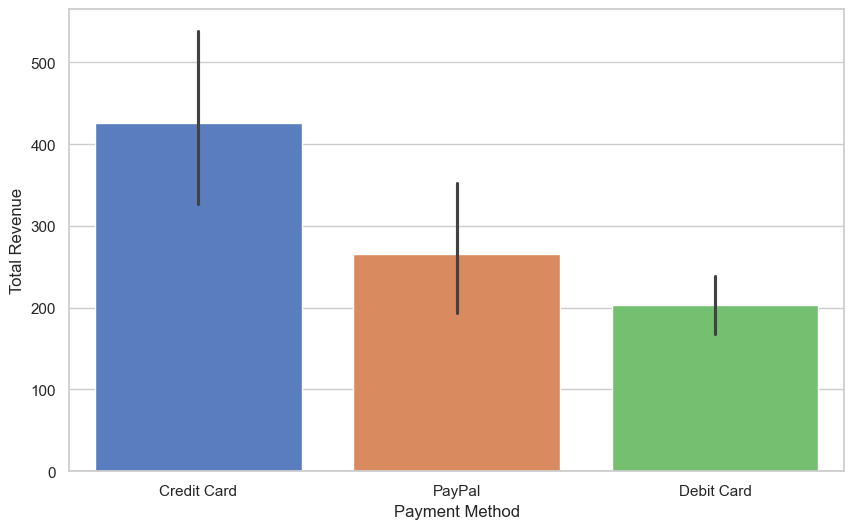

In [39]:
#color = {'Credit Card':'g', 'PayPal':'b', 'Debit Card':'o'}
plt.figure(figsize=(10,6))
sns.barplot(data=df, x='Payment Method', y='Total Revenue', color = 'g',  hue = 'Payment Method', palette = 'muted')

Text(0.5, 1.0, 'Payment Method by Product Category')

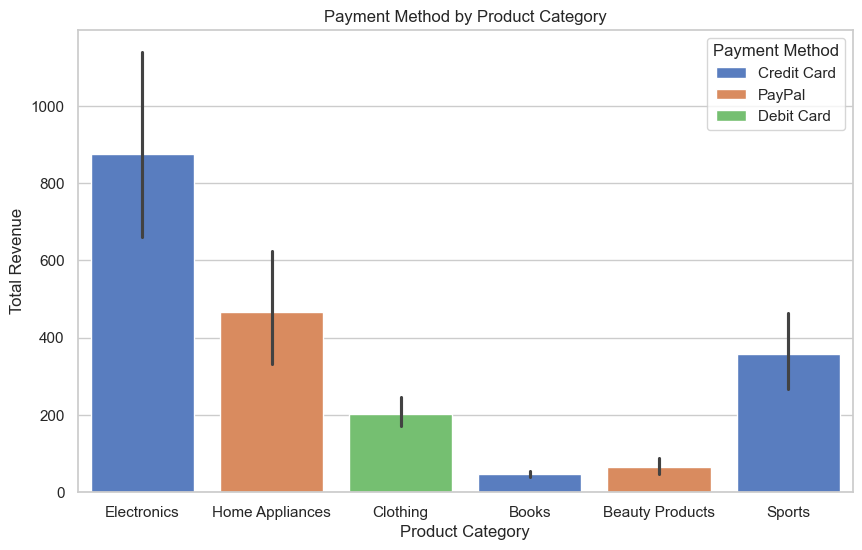

In [193]:
plt.figure(figsize=(10,6))
sns.barplot(data=df, x='Product Category', y='Total Revenue', hue='Payment Method', palette = 'muted')
#plt.ylabel('Sales')
plt.title('Payment Method by Product Category')

Text(0.5, 1.0, 'Units Sold by Category')

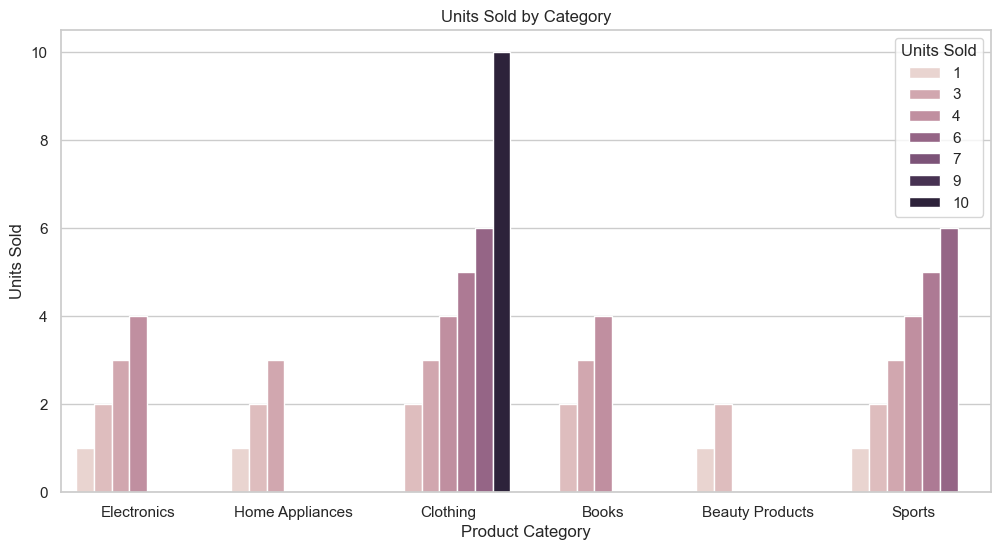

In [197]:
plt.figure(figsize=(12,6))
sns.barplot(x='Product Category',y='Units Sold',data=df, hue='Units Sold')
plt.title('Units Sold by Category')

In [ ]:
# top-selling products within each category to optimize inventory and marketing strategies.

Text(0.5, 1.0, 'Revenue Made by Region')

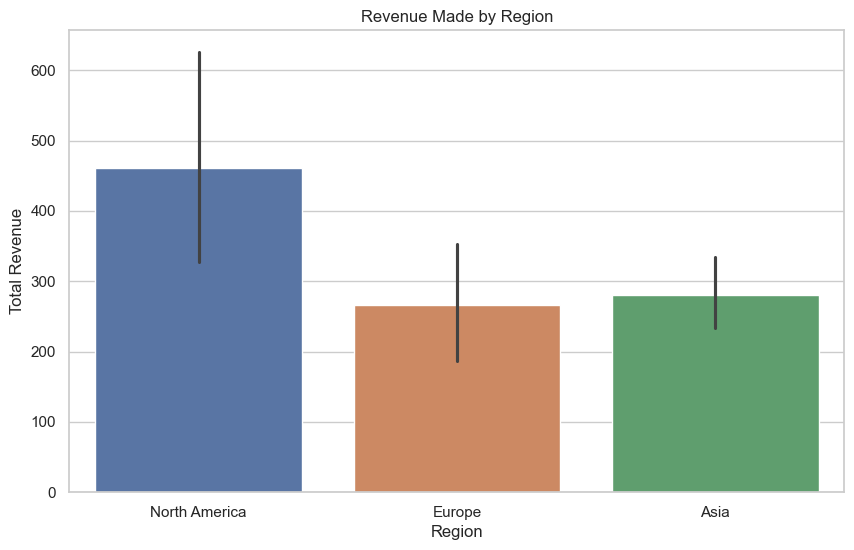

In [212]:
plt.figure(figsize=(10,6))
sns.barplot(data=df, x= 'Region', y = 'Total Revenue', hue ='Region' )
plt.title('Revenue Made by Region')


In [154]:
df['Product Category'].unique()

array(['Electronics', 'Home Appliances', 'Clothing', 'Books',
       'Beauty Products', 'Sports'], dtype=object)

In [40]:
df.head()

,Transaction ID,Date,Product Category,Product Name,Units Sold,Unit Price,Total Revenue,Region,Payment Method,Month
0,10001,2024-01-01,Electronics,iPhone 14 Pro,2,999.99,1999.98,North America,Credit Card,January
1,10002,2024-01-02,Home Appliances,Dyson V11 Vacuum,1,499.99,499.99,Europe,PayPal,January
2,10003,2024-01-03,Clothing,Levi's 501 Jeans,3,69.99,209.97,Asia,Debit Card,January
3,10004,2024-01-04,Books,The Da Vinci Code,4,15.99,63.96,North America,Credit Card,January
4,10005,2024-01-05,Beauty Products,Neutrogena Skincare Set,1,89.99,89.99,Europe,PayPal,January


In [137]:
product_category_units = df.groupby(['Product Category', 'Product Name'])[['Units Sold', 'Total Revenue']].sum().reset_index()
product_category_units.head()

,Product Category,Product Name,Units Sold,Total Revenue
0,Beauty Products,Anastasia Beverly Hills Brow Wiz,2,46.00
1,Beauty Products,Biore UV Aqua Rich Watery Essence Sunscreen,1,15.00
2,Beauty Products,Caudalie Vinoperfect Radiance Serum,1,79.00
3,Beauty Products,CeraVe Hydrating Facial Cleanser,2,29.98
4,Beauty Products,Chanel No. 5 Perfume,1,129.99


In [155]:
beauty_product = product_category_units[product_category_units['Product Category'] == 'Beauty Products']
#beauty_product.head(10)

In [159]:
top_selling_beauty_product_by_units = beauty_product.sort_values('Units Sold', ascending=False)

In [160]:
top_selling_beauty_product_by_units.head(10).reset_index(drop=True)

,Product Category,Product Name,Units Sold,Total Revenue
0,Beauty Products,Anastasia Beverly Hills Brow Wiz,2,46.00
1,Beauty Products,First Aid Beauty Ultra Repair Cream,2,68.00
2,Beauty Products,L'Occitane Shea Butter Hand Cream,2,58.00
3,Beauty Products,Glossier Boy Brow,2,32.00
4,Beauty Products,L'Oreal Revitalift Serum,2,79.98
5,Beauty Products,CeraVe Hydrating Facial Cleanser,2,29.98
6,Beauty Products,Charlotte Tilbury Magic Cream,1,100.00
7,Beauty Products,Laneige Water Sleeping Mask,1,25.00
8,Beauty Products,NARS Radiant Creamy Concealer,1,30.00
9,Beauty Products,Neutrogena Hydro Boost Water Gel,1,16.99


In [161]:
top_selling_beauty_product_by_revenue = beauty_product.sort_values('Total Revenue' , ascending=False)
top_selling_beauty_product_by_revenue.head(10).reset_index(drop=True)

,Product Category,Product Name,Units Sold,Total Revenue
0,Beauty Products,Dyson Supersonic Hair Dryer,1,399.99
1,Beauty Products,La Mer Crème de la Mer Moisturizer,1,190.00
2,Beauty Products,Chanel No. 5 Perfume,1,129.99
3,Beauty Products,Tom Ford Black Orchid Perfume,1,125.00
4,Beauty Products,Sunday Riley Good Genes,1,105.00
5,Beauty Products,Estee Lauder Advanced Night Repair,1,105.00
6,Beauty Products,Lancome La Vie Est Belle,1,102.00
7,Beauty Products,Charlotte Tilbury Magic Cream,1,100.00
8,Beauty Products,Neutrogena Skincare Set,1,89.99
9,Beauty Products,Kiehl's Midnight Recovery Concentrate,1,82.00


In [158]:
Electronics_product = product_category_units[product_category_units['Product Category'] == 'Electronics']

In [162]:
Electronics_product_by_units = Electronics_product.sort_values('Units Sold', ascending=False)
Electronics_product_by_units.head(10).reset_index(drop=True)

,Product Category,Product Name,Units Sold,Total Revenue
0,Electronics,Amazon Echo Dot (4th Gen),4,199.96
1,Electronics,Anker PowerCore Portable Charger,4,239.96
2,Electronics,Bose SoundLink Revolve+ Speaker,3,899.97
3,Electronics,Amazon Fire TV Stick 4K,3,149.97
4,Electronics,Sony WH-1000XM4 Headphones,3,1049.97
5,Electronics,Nintendo Switch,3,899.97
6,Electronics,Apple Watch Series 8,3,1199.97
7,Electronics,GoPro HERO10 Black,3,1199.97
8,Electronics,Samsung Galaxy Tab S8,2,1499.98
9,Electronics,Logitech MX Master 3 Mouse,2,199.98


In [163]:
Electronics_product_by_Revenue = Electronics_product.sort_values('Total Revenue', ascending=False)
Electronics_product_by_Revenue.head(10).reset_index(drop=True)

,Product Category,Product Name,Units Sold,Total Revenue
0,Electronics,Canon EOS R5 Camera,1,3899.99
1,Electronics,MacBook Pro 16-inch,1,2499.99
2,Electronics,Apple MacBook Pro 16-inch,1,2399.00
3,Electronics,iPhone 14 Pro,2,1999.98
4,Electronics,HP Spectre x360 Laptop,1,1599.99
5,Electronics,Samsung Odyssey G9 Gaming Monitor,1,1499.99
6,Electronics,Samsung Galaxy Tab S8,2,1499.98
7,Electronics,Microsoft Surface Laptop 4,1,1299.99
8,Electronics,Samsung QLED 4K TV,1,1199.99
9,Electronics,Apple MacBook Air,1,1199.99


In [178]:
#Home_Appliances_product = product_category_units[product_category_units['Product Category'] == 'Home Appliances']
#Home_Appliances_product_by_units = Home_Appliances_product.sort_values('Units Sold', ascending=False)
#Home_Appliances_product_by_units.head(10).reset_index(drop=True)

In [179]:
Home_Appliances_product = product_category_units[product_category_units['Product Category'] == 'Home Appliances']
Home_Appliances_product_by_revenue = Home_Appliances_product.sort_values('Total Revenue', ascending=False)
Home_Appliances_product_by_revenue.head(10).reset_index(drop=True).drop('Units Sold', axis=1)

,Product Category,Product Name,Total Revenue
0,Home Appliances,LG OLED TV,2599.98
1,Home Appliances,Roomba i7+,1599.98
2,Home Appliances,Blueair Classic 480i,1199.98
3,Home Appliances,De'Longhi Magnifica Espresso Machine,899.99
4,Home Appliances,Dyson Supersonic Hair Dryer,799.98
5,Home Appliances,Shark IQ Robot Vacuum,699.98
6,Home Appliances,Eufy RoboVac 11S,659.97
7,Home Appliances,Breville Smart Grill,599.90
8,Home Appliances,Anova Precision Oven,599.00
9,Home Appliances,Keurig K-Elite Coffee Maker,529.97


In [175]:
Clothings_product = product_category_units[product_category_units['Product Category'] == 'Clothing']
Clothing_product_by_units = Clothings_product.sort_values('Units Sold', ascending=False)
Clothing_product_by_units.head(10).reset_index(drop=True)

,Product Category,Product Name,Units Sold,Total Revenue
0,Clothing,Hanes ComfortSoft T-Shirt,10,99.90
1,Clothing,Nike Air Force 1,6,539.94
2,Clothing,Gap Essential Crewneck T-Shirt,6,119.94
3,Clothing,Forever 21 Graphic Tee,5,64.95
4,Clothing,Tommy Hilfiger Polo Shirt,5,249.95
5,Clothing,Under Armour HeatGear T-Shirt,5,149.95
6,Clothing,Adidas 3-Stripes Shorts,5,149.95
7,Clothing,Calvin Klein Boxer Briefs,5,149.95
8,Clothing,Uniqlo Airism Mesh Boxer Briefs,4,59.60
9,Clothing,Columbia Fleece Jacket,4,239.96


In [176]:
Clothings_product = product_category_units[product_category_units['Product Category'] == 'Clothing']
Clothing_product_by_revenue = Clothings_product.sort_values('Total Revenue', ascending=False)
Clothing_product_by_revenue.head(10).reset_index(drop=True)

,Product Category,Product Name,Units Sold,Total Revenue
0,Clothing,Nike Air Force 1,6,539.94
1,Clothing,North Face Down Jacket,2,499.98
2,Clothing,Ray-Ban Aviator Sunglasses,3,464.97
3,Clothing,Adidas Ultraboost Running Shoes,2,359.98
4,Clothing,Adidas Ultraboost Shoes,2,359.98
5,Clothing,Adidas Originals Superstar Sneakers,4,319.96
6,Clothing,Lululemon Align Leggings,3,294.00
7,Clothing,Patagonia Better Sweater,2,279.98
8,Clothing,Nike Air Force 1 Sneakers,3,270.00
9,Clothing,Adidas Originals Trefoil Hoodie,4,259.96


In [ ]:
'Sports'

In [182]:
Books = product_category_units[product_category_units['Product Category'] == 'Books']
Books_by_revenue = Books.sort_values('Total Revenue', ascending=False)
Books_by_revenue.head(10).reset_index(drop=True)

,Product Category,Product Name,Units Sold,Total Revenue
0,Books,The Silent Patient by Alex Michaelides,5,134.95
1,Books,Becoming by Michelle Obama,4,130.00
2,Books,"Salt, Fat, Acid, Heat by Samin Nosrat",3,107.97
3,Books,The Catcher in the Rye by J.D. Salinger,7,88.93
4,Books,Educated by Tara Westover,3,84.00
5,Books,1984 by George Orwell,4,79.96
6,Books,Where the Crawdads Sing by Delia Owens,4,75.96
7,Books,Harry Potter and the Sorcerer's Stone,3,74.97
8,Books,Dune by Frank Herbert,4,71.96
9,Books,Atomic Habits by James Clear,4,67.96


In [181]:
Books = product_category_units[product_category_units['Product Category'] == 'Books']
Books_by_units = Books.sort_values('Units Sold', ascending=False)
Books_by_units.head(10).reset_index(drop=True)

,Product Category,Product Name,Units Sold,Total Revenue
0,Books,The Catcher in the Rye by J.D. Salinger,7,88.93
1,Books,The Silent Patient by Alex Michaelides,5,134.95
2,Books,The Girl with the Dragon Tattoo by Stieg Larsson,5,52.95
3,Books,1984 by George Orwell,4,79.96
4,Books,To Kill a Mockingbird by Harper Lee,4,59.96
5,Books,The Hunger Games by Suzanne Collins,4,35.96
6,Books,Atomic Habits by James Clear,4,67.96
7,Books,The Girl on the Train by Paula Hawkins,4,43.96
8,Books,The Da Vinci Code,4,63.96
9,Books,Where the Crawdads Sing by Delia Owens,4,75.96


In [183]:
Sports = product_category_units[product_category_units['Product Category'] == 'Sports']
Sports_by_units = Sports.sort_values('Units Sold', ascending=False)
Sports_by_units.head(10).reset_index(drop=True)

,Product Category,Product Name,Units Sold,Total Revenue
0,Sports,Yeti Rambler Tumbler,6,239.94
1,Sports,Spalding NBA Street Basketball,6,149.94
2,Sports,Wilson Evolution Basketball,5,149.95
3,Sports,Titleist Pro V1 Golf Balls,5,249.95
4,Sports,Manduka PRO Yoga Mat,4,479.96
5,Sports,Hydro Flask Wide Mouth Water Bottle,4,159.80
6,Sports,Adidas FIFA World Cup Football,3,89.97
7,Sports,Hydro Flask Standard Mouth Water Bottle,3,98.85
8,Sports,Yeti Rambler Bottle,3,149.97
9,Sports,Rogue Fitness Kettlebell,3,209.97


In [184]:
Sports = product_category_units[product_category_units['Product Category'] == 'Sports']
Sports_by_revenue = Sports.sort_values('Total Revenue', ascending=False)
Sports_by_revenue.head(10).reset_index(drop=True)

,Product Category,Product Name,Units Sold,Total Revenue
0,Sports,Peloton Bike,1,1895.00
1,Sports,Garmin Fenix 6X Pro,1,999.99
2,Sports,Bowflex SelectTech 1090 Adjustable Dumbbells,1,699.99
3,Sports,Fitbit Versa 3,3,689.85
4,Sports,Garmin Forerunner 945,1,599.99
5,Sports,Garmin Edge 530,2,599.98
6,Sports,Babolat Pure Drive Tennis Racket,3,599.97
7,Sports,Polar Vantage V2,1,499.95
8,Sports,Manduka PRO Yoga Mat,4,479.96
9,Sports,GoPro HERO9 Black,1,449.99
